# 先週の課題をMathematicaで実行してみる

Mathematica (Wolfram Language) を実行するには、ラインセンスを取得する必要があるので、残念ながら今回の授業では実行出来ません･･･

In [1]:
(* a, bを正の実数とする *)
Assuming[{a > 0, b > 0},
 
 (* 相加相乗平均の不等式を表す式 *)
 ineq = Sqrt[a*b] <= (a + b)/2;
 
 (* 不等式を2乗すると、以下の式が得られる *)
 ineqSquared = lhs^2 - rhs^2 <= 0 /. ineq;
 
 (* 左辺を展開すると、以下の式が得られる *)
 lhsExpanded = Expand[ineqSquared[[1]]];
 
 (* 右辺を展開すると、以下の式が得られる *)
 rhsExpanded = Expand[ineqSquared[[2]]];
 
 (* 左辺と右辺を比較すると、以下の式が得られる *)
 comparison = lhsExpanded - rhsExpanded;
 
 (* 比較式を展開すると、以下の式が得られる *)
 comparisonExpanded = Expand[comparison];
 
 (* 比較式が0以下であることを示す *)
 Simplify[comparisonExpanded <= 0]
]

ReplaceAll::reps:               a + b
{Sqrt[a b] <= -----} is neither a list of replacement rules nor a valid dispatch table, and so cannot be used for replacing.
                2

2       2
(lhs  <= rhs ) <= True

```ineqSquared = lhs^2 - rhs^2 <= 0 /. ineq```が間違っているので修正する

a + b
Sqrt[a b] <= -----
               2
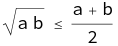

In [3]:
ineq = Sqrt[a * b] <= (a + b)/2

In [4]:
(* lhs *)
ineq[[1]]

Sqrt[a b]

a + b
-----
  2
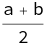

In [5]:
(* rhs *)
ineq[[2]]

2
      (a + b)
a b - -------- <= 0
         4
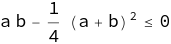

In [4]:
ineqSquared = ineq[[1]]^2 - ineq[[2]]^2 <= 0

In [76]:
(* a, bを正の実数とする *)
Assuming[{a > 0, b > 0},
 
 (* 相加相乗平均の不等式を表す式 *)
 ineq = Sqrt[a*b] <= (a + b)/2;
 
 (* 不等式を2乗すると、以下の式が得られる *)
 ineqSquared = ineq[[1]]^2 - ineq[[2]]^2 <= 0;
 
 (* 左辺を展開すると、以下の式が得られる *)
 lhsExpanded = Expand[ineqSquared[[1]]];
 
 (* 右辺を展開すると、以下の式が得られる *)
 rhsExpanded = Expand[ineqSquared[[2]]];
 
 (* 左辺と右辺を比較すると、以下の式が得られる *)
 comparison = lhsExpanded - rhsExpanded;
 
 (* 比較式を展開すると、以下の式が得られる *)
 comparisonExpanded = Expand[comparison];
 
 (* 比較式が0以下であることを示す *)
 Simplify[comparisonExpanded <= 0]
]

True

2
  1   2   a b   b
-(-) a  + --- - --
  4        2    4
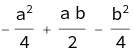

In [5]:
lhsExpanded = Expand[ineqSquared[[1]]]

In [6]:
rhsExpanded = Expand[ineqSquared[[2]]]

0

2
  1   2   a b   b
-(-) a  + --- - --
  4        2    4
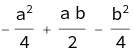

In [7]:
comparison = lhsExpanded - rhsExpanded

2
  1   2   a b   b
-(-) a  + --- - --
  4        2    4
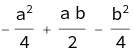

In [8]:
comparisonExpanded = Expand[comparison]

In [9]:
Simplify[comparisonExpanded <= 0]

2
(a - b)  >= 0

In [10]:
Simplify[comparisonExpanded <= 0, {a > 0, b > 0}]

True

## 量化子を導入し消去する

* [Quantifier (logic) - Wikipedia](https://en.wikipedia.org/wiki/Quantifier_%28logic%29)
    - [Universal quantification - Wikipedia](https://en.wikipedia.org/wiki/Universal_quantification) (全称記号: ∀)
    - [Existential quantification - Wikipedia](https://en.wikipedia.org/wiki/Existential_quantification) (存在記号: ∃)

* [Quantifier elimination - Wikipedia](https://en.wikipedia.org/wiki/Quantifier_elimination)
    - [Cylindrical algebraic decomposition - Wikipedia](https://en.wikipedia.org/wiki/Cylindrical_algebraic_decomposition)
    - [CylindricalDecomposition—Wolfram Language Documentation](https://reference.wolfram.com/language/ref/CylindricalDecomposition.html)
        - finds a decomposition of the region represented by the statement _expr_ into cylindrical parts whose directions correspond to the successive _x_${}_{i}$.

* [ForAll—Wolfram Language Documentation](https://reference.wolfram.com/language/ref/ForAll.html)
    - represents the statement that _expr_ is `True` for all values of _x_.
    - _x_ のすべての値について _expr_ が`True`であると宣言する．

2
                 1   2   a b   b
ForAll[{a, b}, -(-) a  + --- - -- <= 0]
                 4        2    4
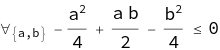

In [11]:
ForAll[{a,b}, comparisonExpanded<=0]

* [Resolve—Wolfram Language Documentation](https://reference.wolfram.com/language/ref/Resolve.html)
    - attempts to resolve _expr_ into a form that eliminates ForAll and Exists quantifiers.
    - _expr_ を限定子ForAllとExistsを除去した形に結合しようと試みる．

In [13]:
Resolve[ForAll[{a,b}, comparisonExpanded <= 0]]

True